In [ ]:
import tensorflow as tf
from keras import Sequential, utils
from keras.layers import Conv2D, Dense, MaxPooling2D, BatchNormalization, Dropout, Flatten
from keras.preprocessing import image
import zipfile
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

100% 149M/149M [00:04<00:00, 44.7MB/s]
100% 149M/149M [00:04<00:00, 35.8MB/s]


In [ ]:
zipf = zipfile.ZipFile('/content/brain-tumor-mri-dataset.zip')
zipf.extractall()

In [ ]:
train_gen = image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range = .2
)

test_gen = image.ImageDataGenerator(
)


In [ ]:
train_data = utils.image_dataset_from_directory(
    directory = '/content/Training',
    image_size = (256,256),
    batch_size = 32,
    labels='inferred',
)

test_data = utils.image_dataset_from_directory(
    image_size = (256,256),
    directory = '/content/Testing',
    batch_size = 32,
    labels='inferred',
)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [ ]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
def process(img,lbl):
  img = tf.cast(img/255, tf.float32)
  return img,lbl

train_data = train_data.map(process)
test_data = test_data.map(process)

In [ ]:
model = Sequential()

model.add(Conv2D(32, input_shape = (256,256,3), kernel_size = (3,3), padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3,3),3, padding='valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3,3),3, padding='valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3,3),3, padding='valid'))

model.add(Conv2D(256, kernel_size = (3,3), padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3,3),3, padding='valid'))

model.add(Flatten())


model.add(Dense(128, 'relu'))
model.add(BatchNormalization())
model.add(Dense(64, 'relu'))
model.add(BatchNormalization())
model.add(Dense(4, 'softmax'))


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)

In [ ]:
hist = model.fit(x=train_data,epochs = 100,callbacks = es, validation_data = test_data)

Epoch 1/100
179/179 [==============================] - 21s 87ms/step - loss: 0.4610 - accuracy: 0.8262 - val_loss: 3.7058 - val_accuracy: 0.3974
Epoch 2/100
179/179 [==============================] - 19s 104ms/step - loss: 0.2548 - accuracy: 0.9076 - val_loss: 1.1340 - val_accuracy: 0.5988
Epoch 3/100
179/179 [==============================] - 15s 85ms/step - loss: 0.1914 - accuracy: 0.9329 - val_loss: 0.7968 - val_accuracy: 0.7475
Epoch 4/100
179/179 [==============================] - 17s 94ms/step - loss: 0.1404 - accuracy: 0.9520 - val_loss: 0.7099 - val_accuracy: 0.7834
Epoch 5/100
179/179 [==============================] - 15s 85ms/step - loss: 0.1329 - accuracy: 0.9541 - val_loss: 0.3707 - val_accuracy: 0.8726
Epoch 6/100
179/179 [==============================] - 16s 87ms/step - loss: 0.0981 - accuracy: 0.9646 - val_loss: 1.3042 - val_accuracy: 0.6895
Epoch 7/100
179/179 [==============================] - 16s 87ms/step - loss: 0.0764 - accuracy: 0.9750 - val_loss: 0.5974 - val_a

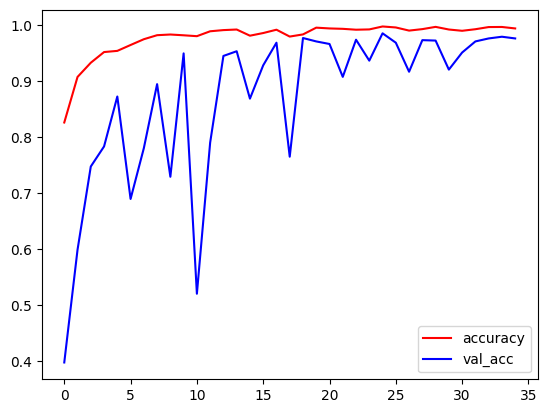

In [ ]:
plt.plot(hist.history['accuracy'], color = 'red', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'blue', label = 'val_acc')
plt.legend()
plt.show()

In [ ]:
pred = model.predict(test_data)

41/41 [==============================] - 3s 48ms/step


In [ ]:
pred

array([[1.6995572e-01, 8.2992136e-01, 4.8073703e-06, 1.1809292e-04],
       [4.1695010e-05, 2.7407764e-04, 9.9968410e-01, 1.2243997e-07],
       [6.0054426e-06, 9.9962604e-01, 3.6265043e-04, 5.2713949e-06],
       ...,
       [1.0786822e-06, 1.5315237e-06, 8.3992036e-06, 9.9998903e-01],
       [9.9996400e-01, 1.6161947e-07, 2.2142045e-08, 3.5809586e-05],
       [5.3578091e-01, 4.6302974e-01, 6.0375790e-08, 1.1893264e-03]],
      dtype=float32)

In [ ]:
pred = np.argmax(pred, axis = 1)

In [ ]:
print(list(pred))

[1, 2, 1, 2, 2, 1, 1, 2, 1, 3, 0, 3, 0, 0, 0, 1, 1, 0, 2, 2, 2, 3, 3, 1, 0, 3, 2, 2, 1, 0, 3, 3, 3, 3, 2, 2, 0, 0, 3, 1, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 0, 1, 0, 1, 3, 3, 2, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2, 2, 0, 2, 1, 3, 2, 0, 3, 0, 0, 3, 2, 3, 2, 1, 3, 1, 2, 2, 2, 3, 1, 1, 1, 0, 0, 3, 1, 3, 3, 1, 3, 3, 2, 0, 1, 0, 1, 3, 0, 1, 2, 2, 2, 0, 3, 2, 0, 1, 1, 0, 1, 2, 3, 3, 2, 2, 3, 1, 2, 3, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 3, 0, 0, 1, 1, 3, 2, 2, 2, 3, 2, 2, 0, 3, 1, 2, 3, 2, 2, 3, 2, 2, 2, 0, 2, 0, 3, 0, 2, 3, 3, 1, 0, 3, 0, 0, 1, 0, 0, 3, 2, 0, 1, 3, 0, 3, 2, 1, 0, 2, 0, 1, 0, 1, 1, 2, 3, 2, 0, 2, 3, 0, 1, 0, 3, 3, 2, 0, 2, 2, 1, 3, 1, 1, 0, 3, 0, 2, 2, 3, 0, 0, 2, 3, 1, 0, 1, 1, 1, 0, 0, 2, 2, 3, 2, 0, 0, 1, 0, 1, 2, 2, 3, 2, 2, 2, 3, 0, 0, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 1, 1, 3, 2, 2, 1, 2, 0, 2, 1, 2, 0, 3, 3, 2, 0, 1, 0, 1, 1, 3, 2, 2, 0, 3, 1, 3, 2, 2, 2, 2, 3, 1, 3, 1, 1, 2, 2, 3, 0, 1, 2, 2, 2, 2, 1, 3, 